In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

2022-11-15 05:44:15.375486: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_data, train_data_labels), (test_data, test_data_labels) = tf.keras.datasets.mnist.load_data()

print(train_data.shape)
print(train_data_labels.shape)

print(test_data.shape)
print(test_data_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

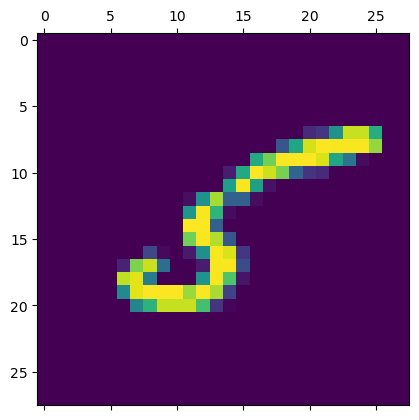

In [3]:
train_data = train_data/255
test_data = test_data/255

plt.matshow(train_data[11]) 
train_data[11]

In [4]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


2022-11-15 05:44:17.731161: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 05:44:17.731884: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_data, train_data_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_data,test_data_labels)

print("Loss=%.3f" %test_loss)

print("Accuracy=%.3f" %test_acc)


Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2711 - accuracy: 0.9223
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1251 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0872 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0670 - accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0532 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0429 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0346 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0302 - accuracy: 0.9903
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0232 - accuracy: 0.9927
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss

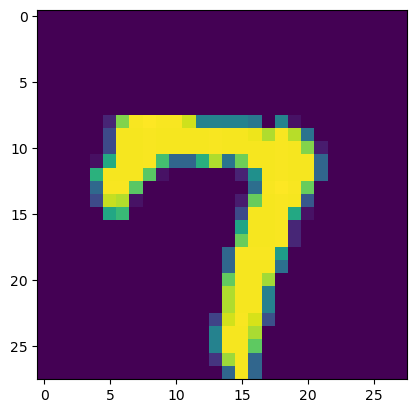

313/313 [==============================] - 2s 6ms/step
Handwritten number in the image is= 7


In [16]:
n=random.randint(0,9999)
plt.imshow(test_data[n])
plt.show()
predicted_value=model.predict(test_data)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))


In [14]:
history.history

{'loss': [0.2710595726966858,
  0.12511396408081055,
  0.08723775297403336,
  0.06700421124696732,
  0.05321497470140457,
  0.042866919189691544,
  0.034584011882543564,
  0.030208779498934746,
  0.02319658361375332,
  0.020119816064834595],
 'accuracy': [0.9223333597183228,
  0.9629999995231628,
  0.9743166565895081,
  0.9796000123023987,
  0.9837833046913147,
  0.9866166710853577,
  0.9892666935920715,
  0.9902999997138977,
  0.9927499890327454,
  0.9934499859809875]}

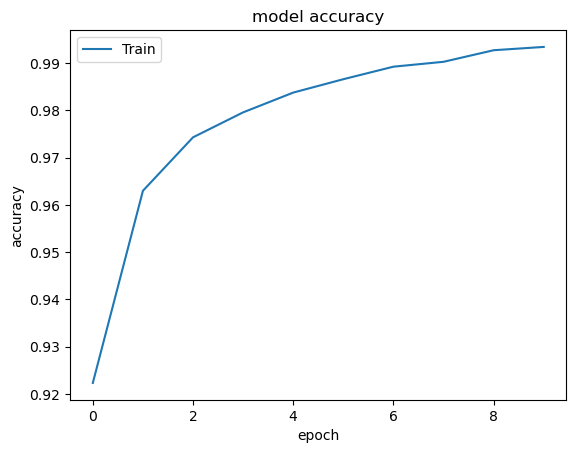

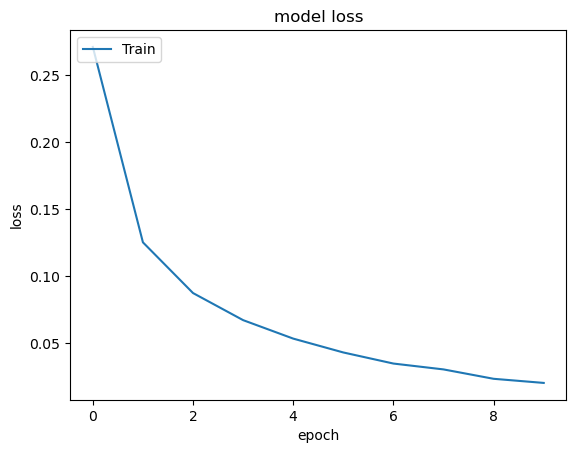

In [15]:

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


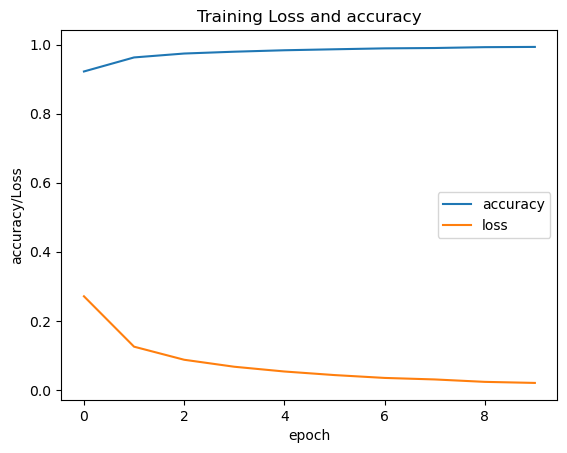

In [9]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'])
plt.show()

#keras_model_path="home/smit/sample_data"
# model.save(keras_model_path)
# restored_keras_model = tf.keras.models.load_model(keras_model_path)